In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as sns 


In [2]:
inp1=pd.read_csv(r'C:\Users\Lenovo\Desktop\Visual Studio Codes\JUPYTER\Upgrad Visualisation and Data Handling\half cleaned data.csv')

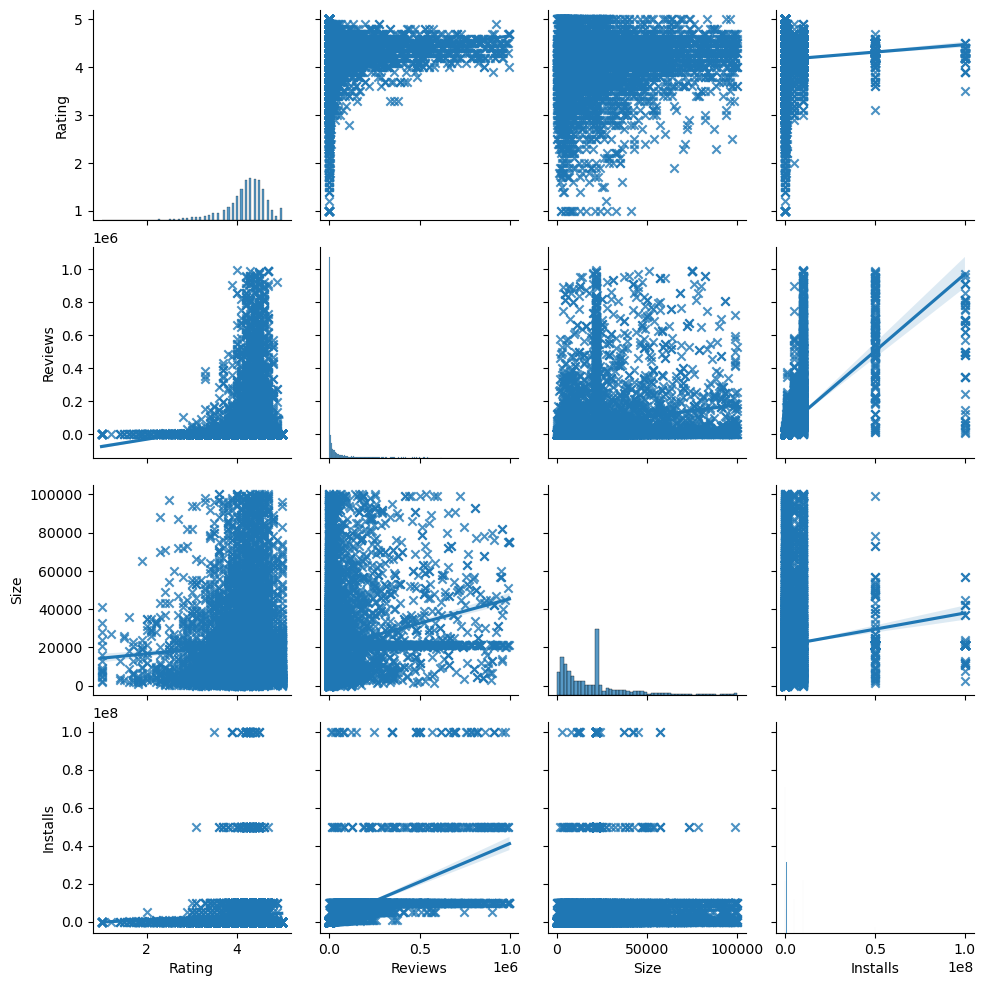

In [3]:
sns.pairplot(inp1[['Rating','Reviews','Size','Installs']],kind='reg',markers='x')
plt.show()

In [4]:
?sns.pairplot

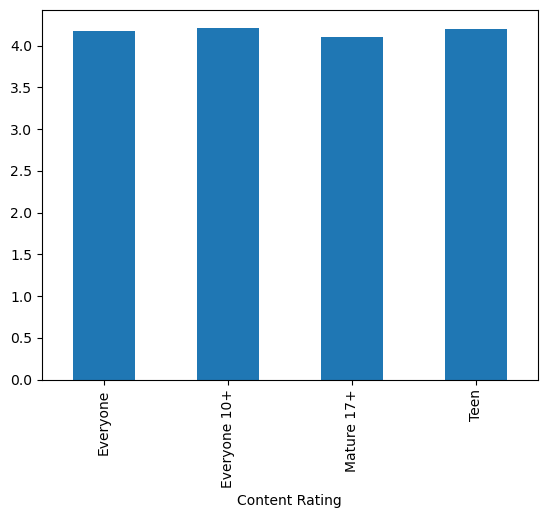

In [5]:
#should make a bar graph 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

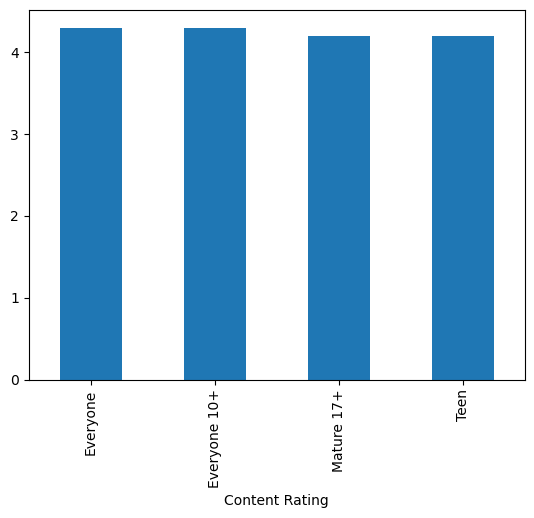

In [6]:
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

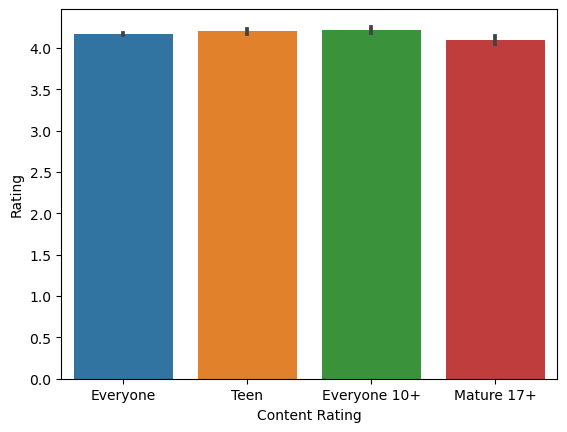

In [7]:
sns.barplot(data=inp1,x='Content Rating',y='Rating')
plt.show()

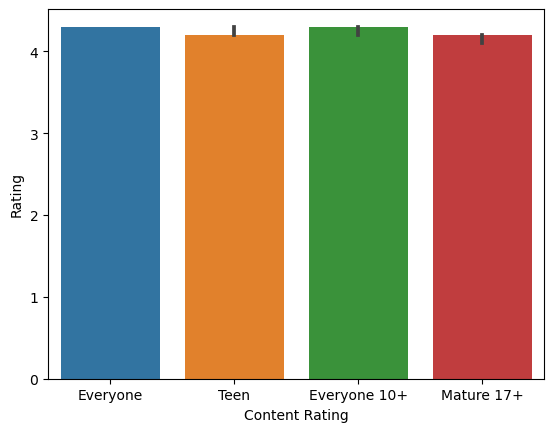

In [8]:
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator=np.median)
plt.show()

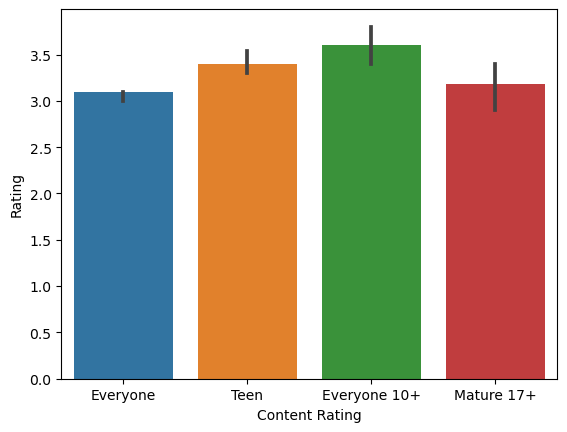

In [9]:
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator=lambda x : np.quantile(x,0.05))
plt.show()

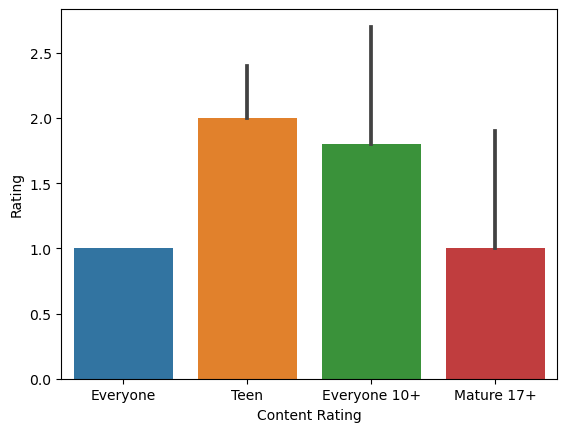

In [10]:
sns.barplot(data=inp1,x='Content Rating',y='Rating',estimator=lambda x : np.min(x))
plt.show()

In [11]:
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.1 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.1 and up


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


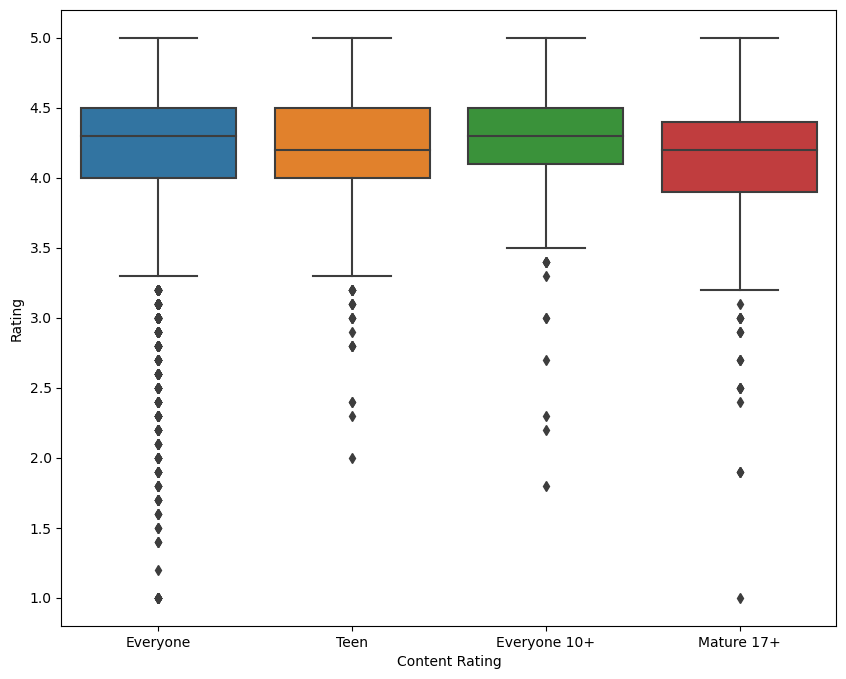

In [12]:
plt.figure(figsize=[10,8])
sns.boxplot(inp1['Content Rating'],inp1.Rating)
plt.show()

In [13]:
inp1.Genres.value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 115, dtype: int64

# Heatmaps!

### Ratings vs Size vs Content Rating

In [14]:
?pd.qcut

In [15]:
inp1['Size Bucket'] = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],['Very Low','Low','Medium','High','Very High'])

In [16]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.1 and up,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.1 and up,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.1 and up,Low
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.1 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.1 and up,Very Low


In [17]:
pd.pivot_table(data=inp1,index = 'Content Rating',columns="Size Bucket",values='Rating', aggfunc=np.median)

Size Bucket,Very Low,Low,Medium,High,Very High
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [18]:
res=pd.pivot_table(data=inp1,index = 'Content Rating',columns="Size Bucket",values='Rating', aggfunc=lambda x : np.quantile(x,0.2))

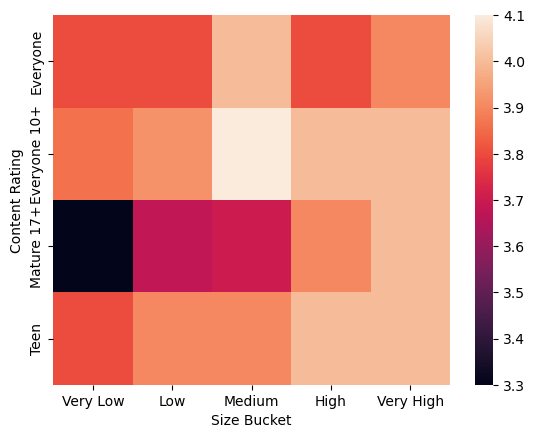

In [19]:
sns.heatmap(res)
plt.show()

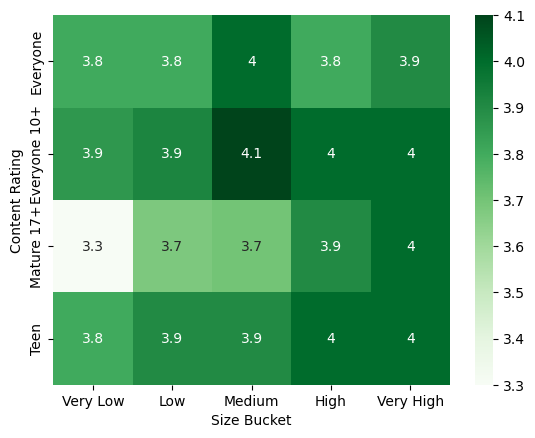

In [20]:
sns.heatmap(res,cmap="Greens",annot=True)
plt.show()

 Analyse the ratings by month

In [21]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [22]:
inp1['Updated_Month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [23]:
inp1.groupby(['Updated_Month'])['Rating'].mean()

Updated_Month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

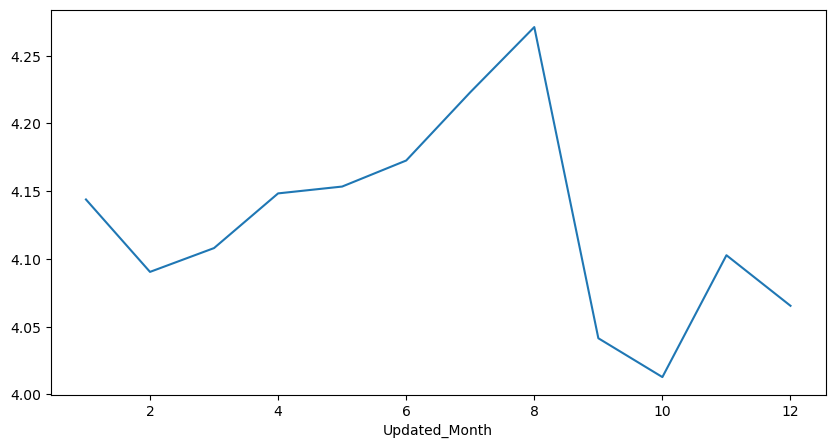

In [24]:
plt.figure(figsize=[10,5])
inp1.groupby(['Updated_Month'])['Rating'].mean().plot()
plt.show()

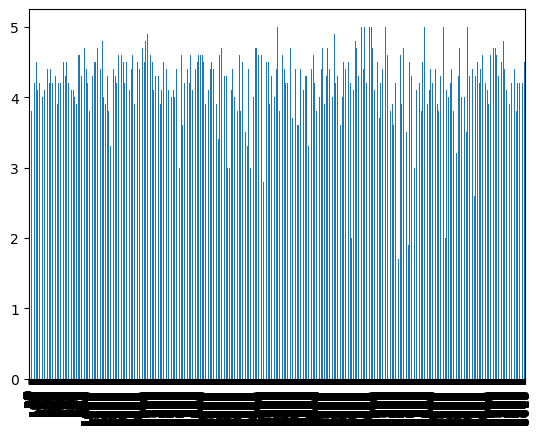

In [25]:
inp1.Rating.plot.bar()
plt.show()

In [26]:
pd.pivot_table(data=inp1 , values='Installs', index='Updated_Month' , columns='Content Rating' , aggfunc=sum )

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [27]:
monthly = pd.pivot_table(data=inp1 , values='Installs', index='Updated_Month' , columns='Content Rating' , aggfunc=sum )

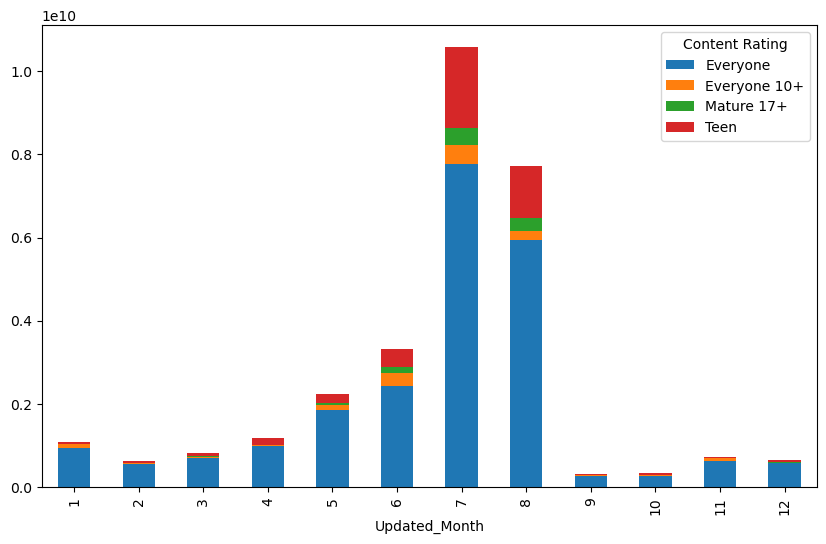

In [28]:
monthly.plot(kind = 'bar' , stacked = True , figsize=[10,6])
plt.show()

In [29]:
monthly_perc = monthly[['Everyone' ,'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x : x/x.sum() ,axis=1)

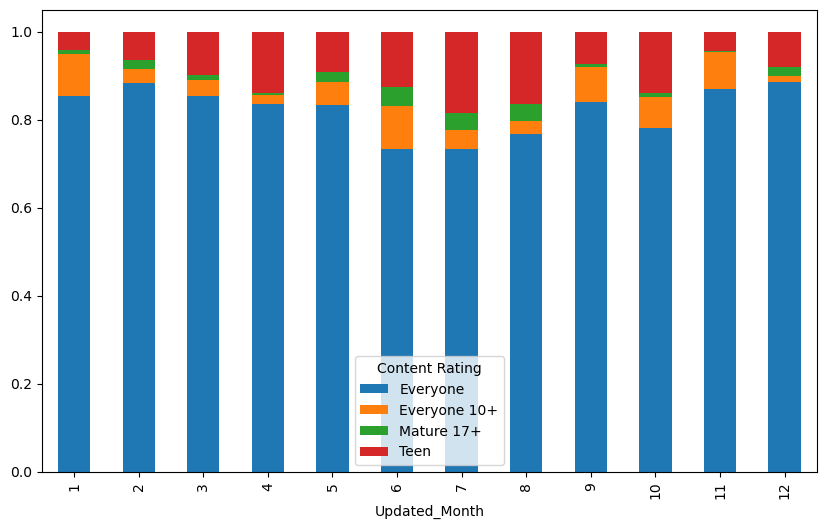

In [30]:
monthly_perc.plot(kind = 'bar' , stacked = True , figsize=[10,6])
plt.show()

### in USA when summer breaks start teens download more apps and hence more installs and more ratings 

In [34]:
res= inp1.groupby(['Updated_Month'])['Rating'].mean()

In [36]:
res.reset_index(inplace=True)


TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [37]:
res

Updated_Month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

In [39]:
import plotly.express as px

In [44]:
fig = px.line(res,x="Updated_Month" , y="Rating" , title = "Monthly average Rating")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Rating'] but received: Updated_Month